In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Read the data 

In [2]:
df = pd.read_excel("Data_Train.xlsx")
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


# EDA Analysis

In [3]:
df.shape

(12690, 9)

In [4]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [6]:
df['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [7]:
df.drop("RESTAURANT_ID",axis = 1, inplace = True)

In [8]:
df['COST'].unique()

array([ 1200,  1500,   800,   300,   600,  1600,   200,   900,   400,
        1400,   350,   500,   450,   700,  1000,   250,  2000,  1100,
         100,   850,  2500,  1800,   150,   650,  3500,   750,   950,
        1300,   180,  2100,   550,    50,  1900,  1750,  1350,    60,
        2200,  5000,    80,  3300,  3800,  1450,  4000,  2800,   120,
        4500,  2400,  1700,  3000,  2600,  5200, 14000,  1550,  4200,
        3700,  1150,  2700,   130,  8000,  3200,  5500,  6500,  1050,
       10000,  3600,   313,  3400,  2300,  3100,  1250,    20,  1650,
        1850,  6000,   140,  4100,  4050,  2900,   599,  7000,   299,
         370,  1950,   320,  1260,    70], dtype=int64)

In [9]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [10]:
df.columns.tolist()

['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST']

In [11]:
df['COST'].value_counts()

300      1595
400      1357
500      1300
200      1031
600       806
         ... 
8000        1
14000       1
5200        1
80          1
70          1
Name: COST, Length: 86, dtype: int64

In [12]:
df.dtypes

TITLE       object
CUISINES    object
TIME        object
CITY        object
LOCALITY    object
RATING      object
VOTES       object
COST         int64
dtype: object

In [13]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
TITLE,113
CUISINES,4155
TIME,2689
CITY,359
LOCALITY,1416
RATING,32
VOTES,1847
COST,86


In [14]:
df.describe()

,COST
count,12690.000000
mean,655.252246
std,627.003540
min,20.000000
25%,300.000000
50%,500.000000
75%,800.000000
max,14000.000000


# fill the null value

In [15]:
df['CITY']=df['CITY'].fillna(df['CITY'].mode()[0])
df['VOTES']=df['VOTES'].fillna(df['VOTES'].mode()[0])
df['RATING']=df['RATING'].fillna(df['RATING'].mode()[0])
df['LOCALITY']=df['LOCALITY'].fillna(df['LOCALITY'].mode()[0])

In [16]:
df.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

In [17]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
QUICK BITES,BAR                1
MEAT SHOP                      1
SWEET SHOP,CONFECTIONERY       1
BEVERAGE SHOP,FOOD COURT       1
BAR,MICROBREWERY               1
Name: TITLE, Length: 113, dtype: int64


South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Italian, Biryani, Fast Food                     1
Desserts, Juices, Fast Food                     1
Asian, Continental, European, North Indian      1
Cafe, Continental, Italian, Lebanese            1
Finger Food, Continental, Asian, Chinese        1
Name: CUISINES, Length: 4155, dtype: int64


1

# check the skewness

In [18]:
df.skew()

COST    3.978801
dtype: float64

# remove the skewness

In [19]:
df['COST']= np.cbrt(df['COST'])

In [20]:
df.skew()

COST    1.172684
dtype: float64

# split the data into two parts categorical and numerical

In [21]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]== "object":
        categorical_col.append(i)
print("categorical columns: ", categorical_col)
print("\n")

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
        
print("Numerical columns: ", numerical_col)

categorical columns:  ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES']


Numerical columns:  ['COST']


# check the relationship using distplot

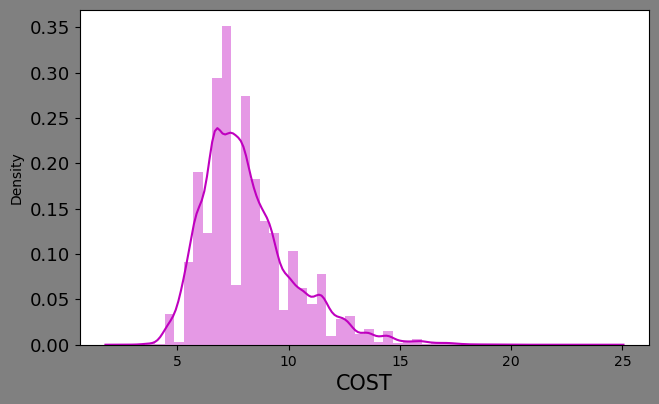

In [22]:
plt.figure(figsize = (25, 20), facecolor = 'grey')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,3, plotnumber)
        sns.distplot(df[col],color = "m")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.show()

# encoded the data 

In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
ord_enc = OrdinalEncoder()
for i in df.columns:
    if df [i].dtypes=='object':
        df[i] = ord_enc.fit_transform(df[i].values.reshape(-1,1))
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31.0,2627.0,739.0,320.0,285.0,17.0,1278.0,10.626586
1,33.0,289.0,1885.0,67.0,1046.0,23.0,950.0,11.447142
2,31.0,2976.0,661.0,67.0,1101.0,19.0,712.0,9.283178
3,95.0,4130.0,275.0,222.0,136.0,22.0,787.0,9.283178
4,50.0,1766.0,615.0,222.0,620.0,19.0,470.0,6.694330
...,...,...,...,...,...,...,...,...
12685,95.0,2934.0,1144.0,131.0,342.0,19.0,1349.0,7.937005
12686,33.0,2143.0,1177.0,222.0,133.0,24.0,191.0,12.164404
12687,71.0,2088.0,1137.0,239.0,1342.0,21.0,1428.0,10.913929
12688,31.0,3506.0,1837.0,67.0,631.0,16.0,996.0,7.368063


In [25]:
x=df.iloc[:,:-1]
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,31.0,2627.0,739.0,320.0,285.0,17.0,1278.0
1,33.0,289.0,1885.0,67.0,1046.0,23.0,950.0
2,31.0,2976.0,661.0,67.0,1101.0,19.0,712.0
3,95.0,4130.0,275.0,222.0,136.0,22.0,787.0
4,50.0,1766.0,615.0,222.0,620.0,19.0,470.0
...,...,...,...,...,...,...,...
12685,95.0,2934.0,1144.0,131.0,342.0,19.0,1349.0
12686,33.0,2143.0,1177.0,222.0,133.0,24.0,191.0
12687,71.0,2088.0,1137.0,239.0,1342.0,21.0,1428.0
12688,31.0,3506.0,1837.0,67.0,631.0,16.0,996.0


# ckeck the vif

In [26]:
import statsmodels.stats as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
x=df.iloc[:,:-1]
x.shape

(12690, 7)

In [28]:
vif=pd.DataFrame()
vif['variable']=x.columns
vif['vif factor']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,variable,vif factor
0,TITLE,4.240590
1,CUISINES,4.463775
2,TIME,3.231962
3,CITY,3.565271
4,LOCALITY,3.352560
5,RATING,6.453902
6,VOTES,4.452877


# seperate the feature and target 

In [29]:
X=df.drop(columns=['COST'])
Y=df['COST']

In [30]:
X

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,31.0,2627.0,739.0,320.0,285.0,17.0,1278.0
1,33.0,289.0,1885.0,67.0,1046.0,23.0,950.0
2,31.0,2976.0,661.0,67.0,1101.0,19.0,712.0
3,95.0,4130.0,275.0,222.0,136.0,22.0,787.0
4,50.0,1766.0,615.0,222.0,620.0,19.0,470.0
...,...,...,...,...,...,...,...
12685,95.0,2934.0,1144.0,131.0,342.0,19.0,1349.0
12686,33.0,2143.0,1177.0,222.0,133.0,24.0,191.0
12687,71.0,2088.0,1137.0,239.0,1342.0,21.0,1428.0
12688,31.0,3506.0,1837.0,67.0,631.0,16.0,996.0


In [31]:
Y

0        10.626586
1        11.447142
2         9.283178
3         9.283178
4         6.694330
           ...    
12685     7.937005
12686    12.164404
12687    10.913929
12688     7.368063
12689     8.434327
Name: COST, Length: 12690, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

# scaled the data

In [33]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [34]:
scaled

array([[-0.86888688,  0.32540837, -0.58465845, ..., -0.92054865,
        -0.29054698,  0.59388432],
       [-0.80783894, -1.61638078,  0.93436872, ...,  0.98623851,
         0.68015275, -0.08589126],
       [-0.86888688,  0.61526483, -0.68804774, ...,  1.12404835,
         0.0330196 , -0.57914305],
       ...,
       [ 0.35207201, -0.12224961, -0.057108  , ...,  1.72790605,
         0.35658617,  0.9047573 ],
       [-0.86888688,  1.055448  ,  0.87074455, ..., -0.05359943,
        -0.45233026,  0.00944312],
       [-0.86888688,  0.59034881, -0.4574101 , ...,  1.70535535,
        -0.61411355,  1.06433876]])

# train and test the data 

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=55)
y_train.head()

4499     8.662391
10513    6.694330
1264     6.299605
6215     8.879040
1127     7.368063
Name: COST, dtype: float64

# train the model

In [36]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

# test score

In [37]:
reg.score(x_train, y_train)

0.19867340841701775

# train score

In [38]:
reg.score(x_test, y_test)

0.2105776176328934

In [39]:
y_pred = reg.predict(x_test)

In [40]:
y_pred

array([8.55803404, 6.8846508 , 8.75451831, ..., 9.37859967, 7.76223111,
       7.79436119])

# check the relationship using scatter plot

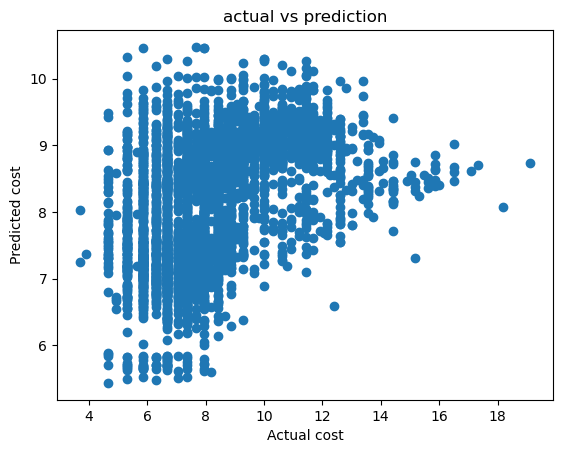

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual cost')
plt.ylabel('Predicted cost')
plt.title('actual vs prediction')
plt.show()

#  check the mean squared error, mean absolute error

In [42]:
y_pred = reg.predict(x_test)

In [43]:
mean_absolute_error(y_test,y_pred)

1.3151260924519785

In [44]:
mean_squared_error(y_test,y_pred)

3.264697672364009

In [45]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.8068474402572037

# train the model using addaboost regressor

In [46]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)

AdaBoostRegressor()

# predict the model

In [47]:
y_pred = ada.predict(x_train)

In [48]:
y_pred

array([ 9.62493593,  8.71562512,  8.30665404, ..., 10.00459149,
        9.39046041,  9.04192832])

# train score

In [49]:
accuracy = metrics.r2_score(y_train, y_pred)
print('R square score',accuracy)

R square score 0.3591064879720327


In [50]:
y_tpred = ada.predict(x_test)

# test score

In [51]:
accurcay = metrics.r2_score(y_test,y_tpred)
print('R square score:', accuracy)

R square score: 0.3591064879720327


# Hyper parameter tuning using addaboostregressor

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
params = {'n_estimators':[47,50,60,70], 
          'learning_rate':[0.09,0.25,0.30]}

In [54]:
rsrch = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

# train the model

In [55]:
rsrch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.09, 0.25, 0.3],
                                        'n_estimators': [47, 50, 60, 70]})

In [56]:
rsrch.best_estimator_

AdaBoostRegressor(learning_rate=0.09, n_estimators=70)

# predict the model

In [57]:
ada = AdaBoostRegressor(learning_rate=0.25, n_estimators=70)

ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print(metrics.r2_score(y_test,y_pred))

0.46162896923321606


# load the model

In [58]:
import pickle

In [59]:
filename = 'foodcosttrain.pkl'
pickle.dump(ada, open(filename, 'wb'))

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# read the test data

In [61]:
df = pd.read_excel("Data_Test.xlsx")
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


# EDA Analysis

In [62]:
df.shape

(4231, 8)

In [63]:
df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [64]:
df.drop('RESTAURANT_ID', axis = 1, inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     4231 non-null   object
 1   CUISINES  4231 non-null   object
 2   TIME      4231 non-null   object
 3   CITY      4196 non-null   object
 4   LOCALITY  4201 non-null   object
 5   RATING    4229 non-null   object
 6   VOTES     3829 non-null   object
dtypes: object(7)
memory usage: 231.5+ KB


In [66]:
df.dtypes

TITLE       object
CUISINES    object
TIME        object
CITY        object
LOCALITY    object
RATING      object
VOTES       object
dtype: object

In [67]:
df.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,4231,4231,4231,4196,4201,4229,3829
unique,86,1727,1183,151,834,31,1136
top,QUICK BITES,"North Indian, Chinese",11am – 11pm (Mon-Sun),Bangalore,Kakkanad,3.8,6 votes
freq,1416,213,447,686,54,414,30


In [68]:
from sklearn.preprocessing import OrdinalEncoder

In [69]:
ord_enc = OrdinalEncoder()
for i in df.columns:
    if df [i].dtypes=='object':
        df[i] = ord_enc.fit_transform(df[i].values.reshape(-1,1))
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23.0,1293.0,503.0,110.0,662.0,23.0,823.0
1,75.0,1632.0,933.0,96.0,221.0,22.0,871.0
2,23.0,1455.0,219.0,96.0,411.0,18.0,575.0
3,66.0,208.0,1071.0,41.0,456.0,18.0,179.0
4,75.0,1637.0,208.0,78.0,300.0,16.0,394.0
...,...,...,...,...,...,...,...
4226,23.0,1425.0,103.0,108.0,597.0,19.0,487.0
4227,66.0,267.0,262.0,9.0,237.0,23.0,722.0
4228,75.0,679.0,1052.0,41.0,696.0,17.0,789.0
4229,75.0,1541.0,215.0,78.0,332.0,0.0,NaN


# fill the null value

In [70]:
df['CITY']=df['CITY'].fillna(df['CITY'].mode()[0])
df['VOTES']=df['VOTES'].fillna(df['VOTES'].mode()[0])
df['RATING']=df['RATING'].fillna(df['RATING'].mode()[0])
df['LOCALITY']=df['LOCALITY'].fillna(df['LOCALITY'].mode()[0])

In [71]:
df.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
dtype: int64

In [72]:
import joblib

In [73]:
import pickle
lm = pickle.load(open('foodcosttrain.pkl','rb'))
result = lm.score(x_test, y_test)
print(result)

0.46162896923321606


In [74]:
lm = pickle.load(open('foodcosttrain.pkl','rb'))
result = lm.predict(df)
print(result)

[ 9.25388774 10.19381832  8.96332473 ...  8.81662171  8.95731874
  8.95773768]


In [75]:
df=pd.DataFrame(result)

In [76]:
df

,0
0,9.253888
1,10.193818
2,8.963325
3,8.655058
4,8.957319
...,...
4226,8.993479
4227,9.284151
4228,8.816622
4229,8.957319


In [77]:
df.value_counts()

8.498992     383
9.220800     167
8.957319     155
9.182019     139
8.895683     139
            ... 
11.055864      1
11.470428      1
11.613926      1
12.343664      1
12.642645      1
Length: 111, dtype: int64